Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends
in investments so that she can take the investment decisions effectively
It wants to invest between 5 to 15 million USD per round of investment
It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in
It wants to know the best type of investment and amount for investment

Business objective: The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'. 
Goals of data analysis: : 
o Investment type analysis: Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy. 
o 	Country analysis: Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favorites as well. 
o 	Sector analysis: Understanding the distribution of investments across the eight main sectors. 


In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stat
import warnings as w
w.filterwarnings("ignore")

### business and data understanding

In [2]:
companies=pd.read_csv("companies.txt",sep="\t",encoding="latin-1")
#using encoding bcz of some latin words present in data
#iso-8859-1 encoding

In [3]:
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [4]:
#treating missing values

In [5]:
rounds2=pd.read_csv("rounds2.csv",encoding="iso-8859-1")

In [6]:
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [7]:
#drop unnessary columns from both data frames

In [8]:
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [9]:
rounds2.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [10]:
companies.drop(["homepage_url","status","state_code","region","city","founded_at"],axis=1,inplace=True)
rounds2.drop(['funding_round_permalink','funding_round_code', 'funded_at'],axis=1,inplace=True)

In [11]:
companies.head()

,permalink,name,category_list,country_code
0,/Organization/-Fame,#fame,Media,IND
1,/Organization/-Qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
3,/Organization/0-6-Com,0-6.com,Curated Web,CHN
4,/Organization/004-Technologies,004 Technologies,Software,USA


In [12]:
rounds2.head()

,company_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,venture,10000000.0
1,/ORGANIZATION/-QOUNTER,venture,NaN
2,/organization/-qounter,seed,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,venture,3406878.0
4,/organization/0-6-com,venture,2000000.0


In [13]:
#convert permalink of both columns to lower case for merging

In [14]:
companies["permalink"]=companies["permalink"].str.lower()
rounds2["company_permalink"]=rounds2["company_permalink"].str.lower()

In [15]:
companies.head()

,permalink,name,category_list,country_code
0,/organization/-fame,#fame,Media,IND
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
3,/organization/0-6-com,0-6.com,Curated Web,CHN
4,/organization/004-technologies,004 Technologies,Software,USA


In [16]:
rounds2.head()

,company_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,venture,10000000.0
1,/organization/-qounter,venture,NaN
2,/organization/-qounter,seed,700000.0
3,/organization/-the-one-of-them-inc-,venture,3406878.0
4,/organization/0-6-com,venture,2000000.0


In [17]:
master=pd.merge(companies,rounds2,left_on="permalink",right_on="company_permalink",how="inner")

In [18]:
master.drop("company_permalink",axis=1,inplace=True)

In [19]:
master.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,venture,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN,venture,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0


In [20]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   permalink           114942 non-null  object 
 1   name                114941 non-null  object 
 2   category_list       111535 non-null  object 
 3   country_code        106271 non-null  object 
 4   funding_round_type  114942 non-null  object 
 5   raised_amount_usd   94958 non-null   float64
dtypes: float64(1), object(5)
memory usage: 6.1+ MB


In [21]:
master.isnull().sum()

permalink                 0
name                      1
category_list          3407
country_code           8671
funding_round_type        0
raised_amount_usd     19984
dtype: int64

In [22]:
100*master.isnull().sum()/len(master)

permalink              0.000000
name                   0.000870
category_list          2.964104
country_code           7.543805
funding_round_type     0.000000
raised_amount_usd     17.386160
dtype: float64

In [23]:
#dropping those rows which have many empty cells 


In [24]:
master[master.isnull().sum(axis=1)>2]

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
201,/organization/2-ladoshki,2 Ladoshki,NaN,NaN,seed,NaN
275,/organization/24med-sp,24med Sp,NaN,NaN,private_equity,NaN
291,/organization/29west,29West,NaN,NaN,undisclosed,NaN
366,/organization/30secondstofly-claire,30SecondsToFly - Claire,NaN,NaN,undisclosed,NaN
439,/organization/3d-forms,3D Forms,NaN,NaN,undisclosed,NaN
...,...,...,...,...,...,...
114235,/organization/zilker-motors,Zilker Motors,NaN,NaN,non_equity_assistance,NaN
114253,/organization/zim-plant-technology-gmbh,ZIM Plant Technology GmbH,NaN,NaN,seed,NaN
114451,/organization/zlote-mysli,Zlote Mysli,NaN,NaN,venture,NaN
114799,/organization/zuoyebang,Zuoyebang,NaN,NaN,venture,NaN


In [25]:
d=master[master.isnull().sum(axis=1)>2].index
d

Int64Index([   201,    275,    291,    366,    439,    455,    510,    533,
               624,    626,
            ...
            113491, 113704, 113716, 113764, 113826, 114235, 114253, 114451,
            114799, 114939],
           dtype='int64', length=1203)

In [26]:
master.drop(index=d,inplace=True,axis=0)

In [27]:
master.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,venture,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN,venture,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0


In [28]:
100*master.isnull().sum()/len(master)

permalink              0.000000
name                   0.000879
category_list          1.937770
country_code           6.565910
funding_round_type     0.000000
raised_amount_usd     16.512366
dtype: float64

In [29]:
#lets remove all null values

In [30]:
master.dropna(inplace=True)

In [31]:
100*master.isnull().sum()/len(master)

permalink             0.0
name                  0.0
category_list         0.0
country_code          0.0
funding_round_type    0.0
raised_amount_usd     0.0
dtype: float64

In [32]:
master.reset_index(drop=True,inplace=True)

In [33]:
master.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0
3,/organization/01games-technology,01Games Technology,Games,HKG,undisclosed,41250.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,seed,43360.0


In [34]:
master.shape

(88528, 6)

###  funding analysis 

In [35]:
master["funding_round_type"].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [36]:
#filtering only 4 funding type

In [37]:
l=['venture', 'seed','angel','private_equity']
master=master[master["funding_round_type"].isin(l)]

In [38]:
master["funding_round_type"].unique()

array(['venture', 'seed', 'private_equity', 'angel'], dtype=object)

In [39]:
master.reset_index(drop=True,inplace=True)

In [40]:
master

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0
3,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,seed,43360.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,venture,719491.0
...,...,...,...,...,...,...
75118,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,Enterprise Software,CHN,venture,1587301.0
75119,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,seed,7000.0
75120,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,seed,33149.0
75121,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,seed,32842.0


In [41]:
#check mean
pt=master.groupby(by="funding_round_type")['raised_amount_usd'].mean().sort_values(ascending=False).apply(lambda x:'{:.1f}'.format(x))
pt

funding_round_type
private_equity    73938486.3
venture           11724222.7
angel               971573.9
seed                747827.9
Name: raised_amount_usd, dtype: object

In [42]:
#sum
pt1=master.groupby(by="funding_round_type")['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x:'{:.1f}'.format(x))
pt1

funding_round_type
venture           560523362596.0
private_equity    134568045021.0
seed               15774682732.0
angel               4274925121.0
Name: raised_amount_usd, dtype: object

In [43]:
#from the above table we can see that venture invesetments is best bcz they have funding btw 5 m to 15m usd

In [44]:
#filtering the required venture type only for further analysis

In [45]:
master2=master[master["funding_round_type"]=="venture"]

In [46]:
master2.reset_index(drop=True,inplace=True)

In [47]:
master2.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0
2,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,venture,719491.0
3,/organization/0xdata,H2O.ai,Analytics,USA,venture,20000000.0
4,/organization/0xdata,H2O.ai,Analytics,USA,venture,1700000.0


In [48]:
master2.shape

(47809, 6)

###  country analysis

In [49]:
#countries where english is official language

In [50]:
l=pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language")

In [51]:
l[0]

,Country,ISO code,Geographic region,Population1,Primary language?
0,Antigua and Barbuda,ATG,Caribbean,85000,Yes (English-based creole language)
1,The Bahamas[1],BHS,Caribbean,331000,Yes (English-based creole language)
2,Barbados[2],BRB,Caribbean,294000,Yes (English-based creole language)
3,Belize[3],BLZ,Central America,288000,Yes (English-based creole language)
4,Botswana[3],BWA,Africa,1882000,Yes
5,Burundi[4],BDI,Africa,10114505,No
6,Cameroon[1],CMR,Africa,22534532,"No (co-official with French, but only spoken p..."
7,Canada,CAN,North America,38048738,"Yes (Co-official with French, and a predominan..."
8,Dominica[1],DMA,Caribbean,73000,Yes (French-based creole language)
9,Eswatini[1],SWZ,Africa,1141000,No


In [52]:
l[1]

,Country,ISO code,Geographic region,Population1,Primary language?
0,Australia,AUS,Oceania,25795700,Yes
1,New Zealand[24],NZL,Oceania,4893830,Yes
2,United Kingdom,GBR,Europe,66040229,Yes
3,United States,USA,North America,328239523,Yes


In [53]:
s1=l[0]["ISO code"]
s2=l[1]["ISO code"]
s3=pd.concat([s2,s1],ignore_index=True)

In [54]:
country_df=pd.DataFrame()
country_df["country_code"]=s3

In [55]:
country_df.head()

,country_code
0,AUS
1,NZL
2,GBR
3,USA
4,ATG


In [56]:
master4=pd.merge(master2,country_df,on="country_code")

In [57]:
master4.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/21diamonds-india,21Diamonds,E-Commerce,IND,venture,6369507.0
2,/organization/247-learning-private,24x7 Learning,EdTech|Education|Systems,IND,venture,4000000.0
3,/organization/3dsoc,3DSoC,3D|Mobile,IND,venture,1240000.0
4,/organization/3dsoc,3DSoC,3D|Mobile,IND,venture,825000.0


In [58]:
master4["country_code"].nunique()

21

In [59]:
master4.shape

(40824, 6)

In [60]:
#total investments per country

In [61]:
english=master4.groupby("country_code")["raised_amount_usd"].sum().sort_values(ascending=False).apply(lambda x:'{:.2f}'.format(x))

In [62]:
english_df=english.to_frame().reset_index()

In [63]:
top9=english_df.head(9)

In [64]:
#top 9 countries with max investments

In [65]:
top9

,country_code,raised_amount_usd
0,USA,420068029342.00
1,GBR,20072813004.00
2,IND,14261508718.00
3,CAN,9482217668.00
4,SGP,2793917856.00
5,IRL,1669285543.00
6,AUS,1319028698.00
7,NZL,448316383.00
8,ZAF,233713106.00


In [66]:
#from the above table  we can say that usa,gbr and india are the top 3  english speaking countries that have received maximum venture funding

### Sector analysis

In [67]:
top3=list(top9["country_code"][:3])

In [68]:
top3

['USA', 'GBR', 'IND']

In [69]:
master5=master4[master4["country_code"].isin(top3)]

In [70]:
master5["country_code"].unique()

array(['IND', 'USA', 'GBR'], dtype=object)

In [71]:
master5.shape

(38803, 6)

In [72]:
master5.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/21diamonds-india,21Diamonds,E-Commerce,IND,venture,6369507.0
2,/organization/247-learning-private,24x7 Learning,EdTech|Education|Systems,IND,venture,4000000.0
3,/organization/3dsoc,3DSoC,3D|Mobile,IND,venture,1240000.0
4,/organization/3dsoc,3DSoC,3D|Mobile,IND,venture,825000.0


In [73]:
#first string before | is considered as primary sector.

In [74]:
master5['category_list']=master5['category_list'].apply(lambda x:x.split("|")[0])

In [75]:
master5.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/21diamonds-india,21Diamonds,E-Commerce,IND,venture,6369507.0
2,/organization/247-learning-private,24x7 Learning,EdTech,IND,venture,4000000.0
3,/organization/3dsoc,3DSoC,3D,IND,venture,1240000.0
4,/organization/3dsoc,3DSoC,3D,IND,venture,825000.0


In [76]:
#reading new file mapping 

In [77]:
mapping=pd.read_csv("mapping.csv")

In [78]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [79]:
mapping["category_list"].unique()

array([nan, '3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alter0tive Medicine', 'Alumni',
       'A0lytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 'B

In [80]:
#as you can see many have spelling diff than in master5

In [81]:
mapping["category_list"]=mapping["category_list"].str.replace("0","na")

In [82]:
mapping["category_list"].unique()

array([nan, '3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alternative Medicine', 'Alumni',
       'Analytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 

In [83]:
#converts your df from horizontally wide to vertically long

In [84]:
df=mapping.melt("category_list",var_name="Sector")

In [85]:
df=df[df["value"]==1]

In [86]:
df.reset_index(drop=True,inplace=True)

In [87]:
df.drop("value",axis=1,inplace=True)

In [88]:
df

,category_list,Sector
0,Adventure Travel,Automotive & Sports
1,Aerospace,Automotive & Sports
2,Auto,Automotive & Sports
3,Automated Kiosk,Automotive & Sports
4,Automotive,Automotive & Sports
...,...,...
683,Social Recruiting,"Social, Finance, Analytics, Advertising"
684,Social Television,"Social, Finance, Analytics, Advertising"
685,Social Travel,"Social, Finance, Analytics, Advertising"
686,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [89]:
master6=pd.merge(master5,df,on="category_list")

In [90]:
master6.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,Sector
0,/organization/-fame,#fame,Media,IND,venture,10000000.0,Entertainment
1,/organization/manas-informatics,Manas Informatic,Media,IND,venture,160000.0,Entertainment
2,/organization/all-def-digital,All Def Digital,Media,USA,venture,5000000.0,Entertainment
3,/organization/audiosocket,Audiosocket,Media,USA,venture,650000.0,Entertainment
4,/organization/audiosocket,Audiosocket,Media,USA,venture,750000.0,Entertainment


In [91]:
master6.shape

(38638, 7)

### sector analysis 2

In [92]:
d1=master6[master6["country_code"]==top3[0]]
d2=master6[master6["country_code"]==top3[1]]
d3=master6[master6["country_code"]==top3[2]]
d1.reset_index(drop=True,inplace=True)
d2.reset_index(drop=True,inplace=True)
d3.reset_index(drop=True,inplace=True)

In [93]:
d1.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,Sector
0,/organization/all-def-digital,All Def Digital,Media,USA,venture,5000000.0,Entertainment
1,/organization/audiosocket,Audiosocket,Media,USA,venture,650000.0,Entertainment
2,/organization/audiosocket,Audiosocket,Media,USA,venture,750000.0,Entertainment
3,/organization/audiosocket,Audiosocket,Media,USA,venture,1582300.0,Entertainment
4,/organization/babble,Babble,Media,USA,venture,2000000.0,Entertainment


In [94]:
d2.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,Sector
0,/organization/90min,90min,Media,GBR,venture,15000000.0,Entertainment
1,/organization/90min,90min,Media,GBR,venture,5800000.0,Entertainment
2,/organization/90min,90min,Media,GBR,venture,18000000.0,Entertainment
3,/organization/teepix,Teepix,Media,GBR,venture,1655405.0,Entertainment
4,/organization/31dover,31Dover,E-Commerce,GBR,venture,2274716.0,Others


In [95]:
d3.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,Sector
0,/organization/-fame,#fame,Media,IND,venture,10000000.0,Entertainment
1,/organization/manas-informatics,Manas Informatic,Media,IND,venture,160000.0,Entertainment
2,/organization/21diamonds-india,21Diamonds,E-Commerce,IND,venture,6369507.0,Others
3,/organization/agrostar,Agrostar,E-Commerce,IND,venture,4000000.0,Others
4,/organization/au-financiers,Au FINANCIERS,E-Commerce,IND,venture,21000000.0,Others


In [96]:
#number of investments  per sector in 3 countries separately
#d1-usa
#d2-gbr
#d3-india

In [97]:
a=d1.groupby("Sector")["raised_amount_usd"].count().sort_values(ascending=False).to_frame().reset_index()
a

,Sector,raised_amount_usd
0,Others,8310
1,Cleantech / Semiconductors,7857
2,"Social, Finance, Analytics, Advertising",7246
3,"News, Search and Messaging",4350
4,Health,3269
5,Manufacturing,2453
6,Entertainment,1794
7,Automotive & Sports,505


In [98]:
b=d2.groupby("Sector")["raised_amount_usd"].count().sort_values(ascending=False).to_frame().reset_index()
b

,Sector,raised_amount_usd
0,Others,516
1,Cleantech / Semiconductors,437
2,"Social, Finance, Analytics, Advertising",421
3,"News, Search and Messaging",241
4,Entertainment,136
5,Manufacturing,122
6,Health,118
7,Automotive & Sports,44


In [99]:
c=d3.groupby("Sector")["raised_amount_usd"].count().sort_values(ascending=False).to_frame().reset_index()
c

,Sector,raised_amount_usd
0,Others,284
1,"Social, Finance, Analytics, Advertising",147
2,"News, Search and Messaging",130
3,Entertainment,76
4,Manufacturing,55
5,Cleantech / Semiconductors,54
6,Health,42
7,Automotive & Sports,31


In [100]:
#total investments sector wise

In [101]:
d1.groupby("Sector")["raised_amount_usd"].sum().sort_values(ascending=False).apply(lambda x:"{:.1f}".format(x)).to_frame().reset_index()

,Sector,raised_amount_usd
0,Cleantech / Semiconductors,118834869645.0
1,"Social, Finance, Analytics, Advertising",86331402349.0
2,Others,82796823598.0
3,"News, Search and Messaging",45439636584.0
4,Health,31675057766.0
5,Manufacturing,24845319470.0
6,Entertainment,17014560960.0
7,Automotive & Sports,11632164696.0


In [102]:
d2.groupby("Sector")["raised_amount_usd"].sum().sort_values(ascending=False).apply(lambda x:"{:.1f}".format(x)).to_frame().reset_index()

,Sector,raised_amount_usd
0,Cleantech / Semiconductors,5052849729.0
1,Others,4492219646.0
2,"Social, Finance, Analytics, Advertising",3773328672.0
3,"News, Search and Messaging",2956023749.0
4,Entertainment,1162564878.0
5,Health,1046654806.0
6,Manufacturing,1019283214.0
7,Automotive & Sports,480878712.0


In [103]:
d3.groupby("Sector")["raised_amount_usd"].sum().sort_values(ascending=False).apply(lambda x:"{:.1f}".format(x)).to_frame().reset_index()

,Sector,raised_amount_usd
0,Others,6329507440.0
1,"News, Search and Messaging",1739579948.0
2,"Social, Finance, Analytics, Advertising",1578804920.0
3,Automotive & Sports,1556350000.0
4,Entertainment,976191777.0
5,Cleantech / Semiconductors,786444633.0
6,Manufacturing,730260000.0
7,Health,564370000.0


In [104]:
pt1.drop("angel",inplace=True)

In [105]:
pt1

funding_round_type
venture           560523362596.0
private_equity    134568045021.0
seed               15774682732.0
Name: raised_amount_usd, dtype: object

In [106]:
pt.drop('angel',inplace=True)

In [107]:
pt

funding_round_type
private_equity    73938486.3
venture           11724222.7
seed                747827.9
Name: raised_amount_usd, dtype: object

In [108]:
top9

,country_code,raised_amount_usd
0,USA,420068029342.00
1,GBR,20072813004.00
2,IND,14261508718.00
3,CAN,9482217668.00
4,SGP,2793917856.00
5,IRL,1669285543.00
6,AUS,1319028698.00
7,NZL,448316383.00
8,ZAF,233713106.00


In [109]:
top9["raised_amount_usd"]=top9["raised_amount_usd"].astype(float)

In [110]:
a=a.head(3)
b=b.head(3)
c=c.head(3)

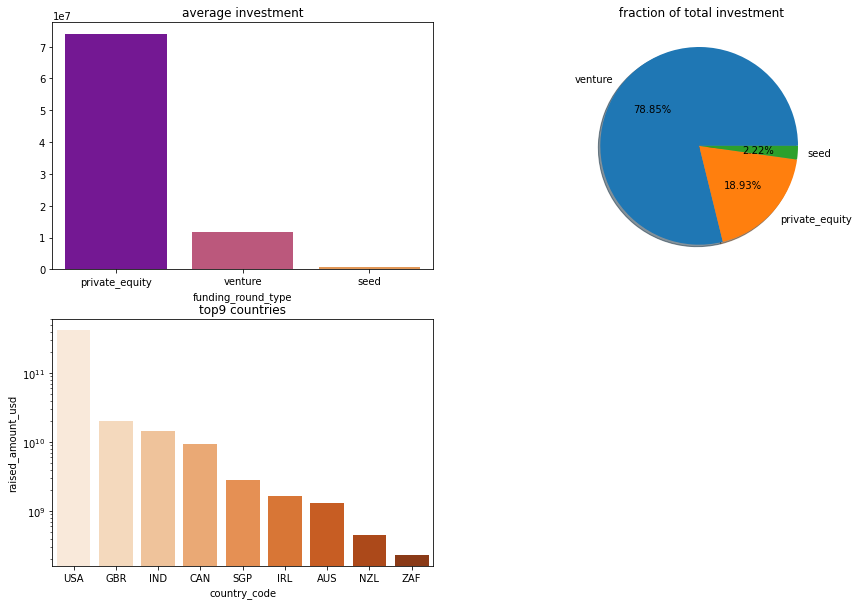

In [111]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sb.barplot(x=pt.index,y=pt.values.astype(float),palette="plasma")
plt.title("average investment")

plt.subplot(222)
plt.title(" fraction of total investment")
plt.pie(pt1.values.astype(float),labels=pt1.index,autopct="%.2f%%",shadow=True)
plt.subplot(223)
sb.barplot(data=top9,x="country_code",y="raised_amount_usd",palette="Oranges")
plt.title("top9 countries")
plt.yscale("log")
plt.show()


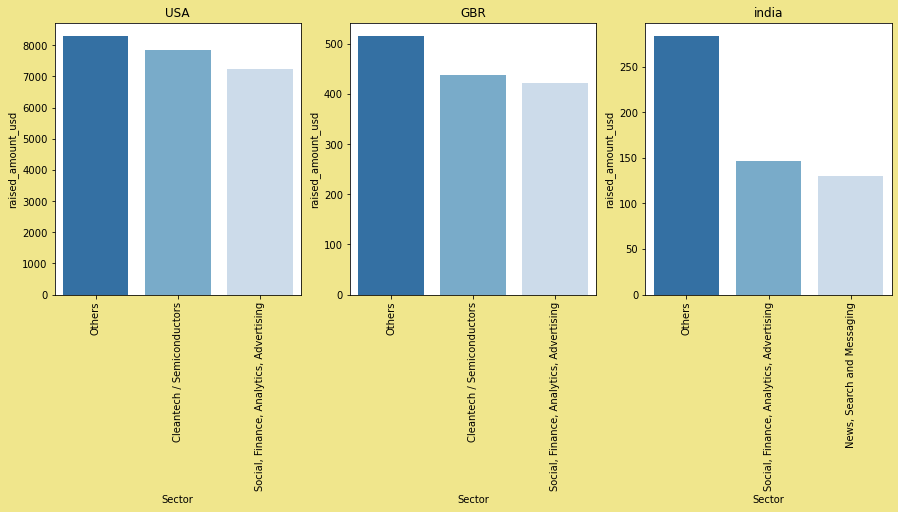

In [112]:


plt.figure(figsize=(15,5),facecolor="khaki")
plt.subplot(131)
sb.barplot(data=a,x="Sector",y="raised_amount_usd",palette="Blues_r")
plt.xticks(rotation=90)
plt.title("USA")

plt.subplot(132)
sb.barplot(data=b,x="Sector",y="raised_amount_usd",palette="Blues_r")
plt.xticks(rotation=90)
plt.title("GBR")

plt.subplot(133)
sb.barplot(data=c,x="Sector",y="raised_amount_usd",palette="Blues_r")
plt.xticks(rotation=90)
plt.title("india")
plt.show()
